<a href="https://colab.research.google.com/github/consequencesunintended/GANGANstyle/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import matplotlib.pyplot as plt

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [0]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [0]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [0]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [0]:
y_true = tf.placeholder(tf.float32,shape=[None])

In [0]:
x_image = tf.reshape(x,[-1,28,28,1])

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can change the 32 output, that essentially represents the amount of filters used
# You need to pass in 32 to the next input though, the 1 comes from the original input of 
# a single image.
convo_1 = convolutional_layer(x_image,shape=[5,5,1,64])
convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
# Using a 6by6 filter here, used 5by5 in video, you can play around with the filter size
# You can actually change the 64 output if you want, you can think of that as a representation
# of the amount of 6by6 filters used.
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,64,32])
convo_2_pooling = max_pool_2by2(convo_2)

In [0]:
# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*32])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [0]:
# NOTE THE PLACEHOLDER HERE!
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred = tf.nn.softmax( normal_full_layer(full_layer_one,10) )

In [0]:
cross_entropy = tf.keras.losses.sparse_categorical_crossentropy(y_pred=y_pred,y_true=y_true)

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [0]:
steps = 5000
samples = []

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(50)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:            
            
            batch_test_x , batch_test_y = mnist.test.next_batch(1)
            eval_res = tf.equal(tf.argmax(y_pred, 1), tf.dtypes.cast(y_true, tf.int64) )
            acc = tf.reduce_mean(tf.cast(eval_res, tf.float64 ) )
            y_eval = acc.eval(feed_dict={x:mnist.test.images, y_true:mnist.test.labels})
            gen_sample = convo_2.eval(feed_dict={x:batch_test_x, y_true:batch_test_y})
            samples.append(gen_sample)
            print(y_eval)
    

0.077
0.8531
0.9137
0.934
0.9469
0.9492
0.9539
0.9546
0.964
0.9675
0.9644
0.9707
0.9707
0.9754
0.9765
0.9676
0.9724
0.9769
0.9742
0.9752
0.9711
0.9752
0.9803
0.978
0.9812
0.982
0.9783
0.981
0.9825
0.9806
0.9824
0.9777


KeyboardInterrupt: ignored

In [0]:
from keras import backend as K
# K.tf.compat.v1.disable_eager_execution()
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
n_labels = 10
input_shape = [28,28,1]
pool_size=(2, 2)
kernel=3

# encoder
inputs = Input(shape=input_shape)

conv_1 = Convolution2D(64, (3, 3), padding="same")(inputs)
conv_1 = MaxPooling2D(padding="same")(conv_1)

conv_2 = Convolution2D(32, (3, 3), padding="same")(conv_1)
conv_2 = MaxPooling2D(padding="same")(conv_2)

conv_3 = Flatten()(conv_2)
conv_3 = Dense(1024)(conv_3)
conv_3 = Activation("relu")(conv_3)

conv_4 = Dense(10)(conv_3)
outputs = Activation("softmax")(conv_4)

model = Model(inputs=inputs, outputs=outputs, name="Classi")

from keras import optimizers

adam_op = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam_op, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
batch_train_x , batch_train_y = mnist.train.next_batch(55000)
batch_test_x , batch_test_y = mnist.test.next_batch(40)
batch_train_x = batch_train_x.reshape( 55000, 28, 28, 1 )
batch_test_x = batch_test_x.reshape( 40, 28, 28, 1 )
model.fit( batch_train_x, batch_train_y, validation_data=[batch_test_x, batch_test_y], batch_size=50, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 40 samples
Epoch 1/5





55000/55000 [==============================] - 116s 2ms/step - loss: 0.3288 - acc: 0.9119 - val_loss: 0.1170 - val_acc: 0.9500
Epoch 2/5
55000/55000 [==============================] - 115s 2ms/step - loss: 0.0922 - acc: 0.9732 - val_loss: 0.0221 - val_acc: 1.0000
Epoch 3/5
23700/55000 [===========>..................] - ETA: 1:05 - loss: 0.0607 - acc: 0.9818

KeyboardInterrupt: ignored

In [0]:
import pandas as pd
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [0]:
data = pd.read_csv("list.txt", sep=" ", names=["NAME", "ID", "SPECIES", "BREED ID"])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
f = open('drive/My Drive/FaceGAN/pets masks/pets_images.pckl', 'rb')
images = pickle.load(f)
f.close()

In [0]:
# for i in range(len(data)):
#   image = images[data['NAME'][i]]
#   image = Image.fromarray((image * 255).astype(np.uint8))
#   image = image.resize((64, 64))
#   images[data['NAME'][i]] = np.array(image) / 255

In [0]:
# plt.imshow(image)

In [0]:
f = open('drive/My Drive/FaceGAN/pets masks/dictionary-clean.pckl', 'rb')
mask_images = pickle.load(f)
f.close()

In [0]:
# for i in range(len(data)):
#   image = mask_images[data['NAME'][i]]
#   image = Image.fromarray((np.array(image) * 255).astype(np.uint8))
#   image = image.resize((64, 64))
#   mask_images[data['NAME'][i]] = np.array(image) / 255

In [0]:
# plt.imshow(image)

In [0]:
import numpy as np
x_values = []
y_values = []
for i in range(len(data)):
  x_values.append( images[data['NAME'][i]] )
  y_values.append( np.array(mask_images[data['NAME'][i]]) - 1 )
del images
del mask_images
del data

In [11]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Model

In [0]:
# K.tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation, Reshape
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [0]:
from tensorflow.keras.layers import Layer

class MaxPoolingWithArgmax2D(Layer):

    def __init__(
            self,
            pool_size=(2, 2),
            strides=(2, 2),
            padding='same',
            **kwargs):
        super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)
        self.padding = padding
        self.pool_size = pool_size
        self.strides = strides

    def call(self, inputs, **kwargs):
        padding = self.padding
        pool_size = self.pool_size
        strides = self.strides
        ksize = [1, pool_size[0], pool_size[1], 1]
        padding = padding.upper()
        strides = [1, strides[0], strides[1], 1]
        output, argmax = tf.nn.max_pool_with_argmax(
                inputs,
                ksize=ksize,
                strides=strides,
                padding=padding)
        argmax = tf.cast(argmax, tf.keras.backend.floatx() )
        return [output, argmax]

    def compute_output_shape(self, input_shape):
        ratio = (1, 2, 2, 1)
        output_shape = [
                dim//ratio[idx]
                if dim is not None else None
                for idx, dim in enumerate(input_shape)]
        output_shape = tuple(output_shape)
        return [output_shape, output_shape]

    def compute_mask(self, inputs, mask=None):
        return 2 * [None]


In [0]:
class MaxUnpooling2D(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super(MaxUnpooling2D, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs, output_shape=None):
        updates, mask = inputs[0], inputs[1]
        with tf.variable_scope(self.name):
          mask = tf.keras.backend.cast(mask, 'int32')
          input_shape = tf.shape(updates, out_type='int32')
          #  calculation new shape
          if output_shape is None:
              output_shape = (
                      input_shape[0],
                      input_shape[1]*self.size[0],
                      input_shape[2]*self.size[1],
                      input_shape[3])
          self.output_shape1 = output_shape

          # calculation indices for batch, height, width and feature maps
          one_like_mask = tf.keras.backend.ones_like(mask, dtype='int32')
          batch_shape = tf.keras.backend.concatenate(
                  [[input_shape[0]], [1], [1], [1]],
                  axis=0)
          batch_range = tf.keras.backend.reshape(
                  tf.range(output_shape[0], dtype='int32'),
                  shape=batch_shape)
          b = one_like_mask * batch_range
          y = mask // (output_shape[2] * output_shape[3])
          x = (mask // output_shape[3]) % output_shape[2]
          feature_range = tf.range(output_shape[3], dtype='int32')
          f = one_like_mask * feature_range

          # transpose indices & reshape update values to one dimension
          updates_size = tf.size(updates)
          indices = tf.keras.backend.transpose(tf.keras.backend.reshape(
              tf.keras.backend.stack([b, y, x, f]),
              [4, updates_size]))
          values = tf.keras.backend.reshape(updates, [updates_size])
          ret = tf.scatter_nd(indices, values, output_shape)
          return ret

    def compute_output_shape(self, input_shape):
        mask_shape = input_shape[1]
        return (
                mask_shape[0],
                mask_shape[1]*self.size[0],
                mask_shape[2]*self.size[1],
                mask_shape[3]
                )

In [16]:
n_labels = 3
input_shape = [128,128,3]
pool_size=(2, 2)
kernel=3
BATCH_SIZE = 50

# encoder
inputs = Input(shape=input_shape)

conv_1 = Convolution2D(64, (3, 3), padding="same")(inputs)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Activation("relu")(conv_1)
conv_2 = Convolution2D(64, (3, 3), padding="same")(conv_1)
conv_2 = BatchNormalization()(conv_2)
conv_2 = Activation("relu")(conv_2)

pool_1, mask_1 = MaxPoolingWithArgmax2D((2, 2))(conv_2)

conv_3 = Convolution2D(128, (3, 3), padding="same")(pool_1)
conv_3 = BatchNormalization()(conv_3)
conv_3 = Activation("relu")(conv_3)
conv_4 = Convolution2D(128, (3, 3), padding="same")(conv_3)
conv_4 = BatchNormalization()(conv_4)
conv_4 = Activation("relu")(conv_4)

pool_2, mask_2 = MaxPoolingWithArgmax2D((2, 2))(conv_4)

conv_5 = Convolution2D(256, (3, 3), padding="same")(pool_2)
conv_5 = BatchNormalization()(conv_5)
conv_5 = Activation("relu")(conv_5)
conv_6 = Convolution2D(256, (3, 3), padding="same")(conv_5)
conv_6 = BatchNormalization()(conv_6)
conv_6 = Activation("relu")(conv_6)
conv_7 = Convolution2D(256, (3, 3), padding="same")(conv_6)
conv_7 = BatchNormalization()(conv_7)
conv_7 = Activation("relu")(conv_7)

pool_3, mask_3 = MaxPoolingWithArgmax2D((2, 2))(conv_7)

conv_8 = Convolution2D(512, (3, 3), padding="same")(pool_3)
conv_8 = BatchNormalization()(conv_8)
conv_8 = Activation("relu")(conv_8)
conv_9 = Convolution2D(512, (3, 3), padding="same")(conv_8)
conv_9 = BatchNormalization()(conv_9)
conv_9 = Activation("relu")(conv_9)
conv_10 = Convolution2D(512, (3, 3), padding="same")(conv_9)
conv_10 = BatchNormalization()(conv_10)
conv_10 = Activation("relu")(conv_10)

pool_4, mask_4 = MaxPoolingWithArgmax2D((2, 2))(conv_10)

conv_11 = Convolution2D(512, (3, 3), padding="same")(pool_4)
conv_11 = BatchNormalization()(conv_11)
conv_11 = Activation("relu")(conv_11)
conv_12 = Convolution2D(512, (3, 3), padding="same")(conv_11)
conv_12 = BatchNormalization()(conv_12)
conv_12 = Activation("relu")(conv_12)
conv_13 = Convolution2D(512, (3, 3), padding="same")(conv_12)
conv_13 = BatchNormalization()(conv_13)
conv_13 = Activation("relu")(conv_13)

pool_5, mask_5 = MaxPoolingWithArgmax2D((2, 2))(conv_13)
print("Build enceder done..")

# decoder

unpool_1 = MaxUnpooling2D((2, 2))([pool_5, mask_5], [BATCH_SIZE, 8, 8, 512])

conv_14 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_1)
conv_14 = BatchNormalization()(conv_14)
conv_14 = Activation("relu")(conv_14)
conv_15 = Convolution2D(512, (kernel, kernel), padding="same")(conv_14)
conv_15 = BatchNormalization()(conv_15)
conv_15 = Activation("relu")(conv_15)
conv_16 = Convolution2D(512, (kernel, kernel), padding="same")(conv_15)
conv_16 = BatchNormalization()(conv_16)
conv_16 = Activation("relu")(conv_16)

unpool_2 = MaxUnpooling2D((2, 2))([conv_16, mask_4], [BATCH_SIZE, 16, 16, 512])

conv_17 = Convolution2D(512, (kernel, kernel), padding="same")(unpool_2)
conv_17 = BatchNormalization()(conv_17)
conv_17 = Activation("relu")(conv_17)
conv_18 = Convolution2D(512, (kernel, kernel), padding="same")(conv_17)
conv_18 = BatchNormalization()(conv_18)
conv_18 = Activation("relu")(conv_18)
conv_19 = Convolution2D(256, (kernel, kernel), padding="same")(conv_18)
conv_19 = BatchNormalization()(conv_19)
conv_19 = Activation("relu")(conv_19)

unpool_3 = MaxUnpooling2D((2, 2))([conv_19, mask_3], [BATCH_SIZE, 32, 32, 256])

conv_20 = Convolution2D(256, (kernel, kernel), padding="same")(unpool_3)
conv_20 = BatchNormalization()(conv_20)
conv_20 = Activation("relu")(conv_20)
conv_21 = Convolution2D(256, (kernel, kernel), padding="same")(conv_20)
conv_21 = BatchNormalization()(conv_21)
conv_21 = Activation("relu")(conv_21)
conv_22 = Convolution2D(128, (kernel, kernel), padding="same")(conv_21)
conv_22 = BatchNormalization()(conv_22)
conv_22 = Activation("relu")(conv_22)

unpool_4 = MaxUnpooling2D((2, 2))([conv_22, mask_2], [BATCH_SIZE, 64, 64, 128])

conv_23 = Convolution2D(128, (kernel, kernel), padding="same")(unpool_4)
conv_23 = BatchNormalization()(conv_23)
conv_23 = Activation("relu")(conv_23)
conv_24 = Convolution2D(64, (kernel, kernel), padding="same")(conv_23)
conv_24 = BatchNormalization()(conv_24)
conv_24 = Activation("relu")(conv_24)

unpool_5 = MaxUnpooling2D((2, 2))([conv_24, mask_1], [BATCH_SIZE, 128, 128, 64])

conv_25 = Convolution2D(64, (kernel, kernel), padding="same")(unpool_5)
conv_25 = BatchNormalization()(conv_25)
conv_25 = Activation("relu")(conv_25)

conv_26 = Convolution2D(n_labels, (1, 1), padding="valid")(conv_25)
conv_26 = BatchNormalization()(conv_26)
conv_26 = Reshape(
        (input_shape[0]*input_shape[1], n_labels),
        input_shape=(input_shape[0], input_shape[1], n_labels))(conv_26)

outputs = Activation("softmax")(conv_26)
print("Build decoder done..")

model = Model(inputs=inputs, outputs=outputs, name="SegNet")

from keras import optimizers

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Build enceder done..

Build decoder done..


Using TensorFlow backend.


In [0]:
import numpy as np

x_train_values = np.array(x_values[:1000])
y_train_values = np.array(y_values[:1000])

x_test_values = np.array(x_values[-250:])
y_test_values = np.array(y_values[-250:])

del x_values
del y_values

In [18]:
x_test_values.shape

(250, 128, 128, 3)

In [0]:
y_train_values = np.reshape( y_train_values, [len(y_train_values), 128 * 128 , 1])
y_test_values = np.reshape( y_test_values, [len(y_test_values), 128 * 128 , 1])


In [20]:
model.fit( x_train_values, y_train_values, validation_data=[x_test_values, y_test_values], batch_size=BATCH_SIZE, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1000 samples, validate on 250 samples
Epoch 1/5
 150/1000 [===>..........................] - ETA: 11:32 - loss: 1.2311 - acc: 0.4368

KeyboardInterrupt: ignored

In [0]:
x_predict_value = np.array(x_test_values[:50])
y_predict_value = np.array(y_test_values[:50])

In [89]:
x_predict_value.shape

(50, 128, 128, 3)

In [0]:
predicted_value = model.predict_on_batch( x=x_predict_value)

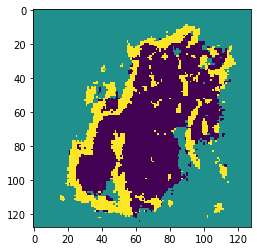

In [106]:
import matplotlib.pyplot as plt
new_value = np.argmax(predicted_value[47], axis=-1)
plt.imshow(new_value.reshape(128,128))

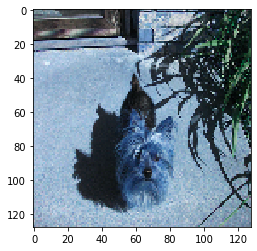

In [107]:
plt.imshow(x_predict_value[47].reshape(128,128,3))

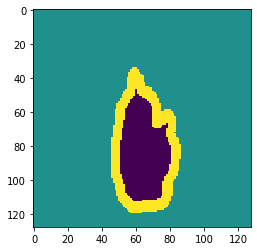

In [108]:
plt.imshow(y_predict_value[47].reshape(128,128))